In [1]:
import Tools.readData as readData
import sys
import os

###### DNN Config ######
initializer1='glorot_normal' 
batch_size=5000
epochs=300
###### DNN Config ######

loadnew = 0

CommonSel='(ele_pt > 10) & (abs(scl_eta) < 1.442) & (abs(scl_eta) < 2.5)'

CommonSelName="_HighpTBarrel_bHadOnly10pct_addedZprime_allxsec1"

plot_dir='plots'+CommonSelName+'/'
import os 
os.system('mkdir '+plot_dir)
#get_ipython().system('mkdir $plot_dir')

pt_bins = [10,20,30,40,50,70,80,100,5000] #For robustness check
eta_bins = [-1.566,-1.0, 0, 1.0,1.566]#For robustness check

PromptSel='((matchedToGenEle == 1) | (matchedToGenEle == 2)) & (matchedToGenPhoton==0)'
bHadSel='(matchedToGenEle != 1) & (matchedToGenEle != 2) &  (matchedToHadron==3) & (matchedToGenTauJet==0) & (matchedToGenPhoton==0) & (index%10==0)'
QCDSel='(matchedToGenEle ==0) &  (matchedToHadron!=3) & (matchedToGenTauJet==0) & (matchedToGenPhoton==0)'
hadtauSel='(matchedToGenEle == 0) & (matchedToGenTauJet==1) & (matchedToGenPhoton==0)'
PhoSel='(matchedToGenEle != 1) & (matchedToGenEle != 2) &  (matchedToHadron==0) & (matchedToGenTauJet==0) & (matchedToGenPhoton==1)'

In [2]:
loca='/scratch/PFNtuples_May2021/'

'''
processes=[{'path':loca+'DYJets_incl_MLL-50_TuneCP5_14TeV-madgraphMLM-pythia8_NEv_3943691_debug.root',
            'xsecwt': 1, 'selection':PromptSel, 'EleType':0, 'CommonSelection':CommonSel},
           
           {'path':loca+'ZprimeToTT_M4000_W40_TuneCP5_14TeV-madgraphMLM-pythia8_N-112431.root',
            'xsecwt': 1, 'selection':PromptSel, 'EleType':0, 'CommonSelection':CommonSel},

           {'path':loca+'QCD_Pt-15to20_bcToE_TuneCP5_13TeV_Run2_NEv_4316068_debug.root',
            'xsecwt': 186200.0/4316068, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
         
           {'path':loca+'QCD_Pt-20to30_bcToE_TuneCP5_13TeV_Run2_NEv_8694646_debug.root',
            'xsecwt': 303800.0/8694646, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-30to80_bcToE_TuneCP5_13TeV_Run2_NEv_15177630_debug.root',
            'xsecwt': 362300.0/15177630, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-80to170_bcToE_TuneCP5_13TeV_Run2_NEv_14934946_debug.root',
            'xsecwt': 33700.0/14934946, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-170to250_bcToE_TuneCP5_13TeV_Run2_NEv_9096781_debug.root',
            'xsecwt': 2125.0/9096781, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-250toInf_bcToE_TuneCP5_13TeV_Run2_NEv_10191317_debug.root',
            'xsecwt': 562.5/10191317, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
            
           {'path':loca+'QCD_Pt-15to20_bcToE_TuneCP5_13TeV_Run2_NEv_4316068_debug.root',
            'xsecwt': 186200.0/4316068, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
         
           {'path':loca+'QCD_Pt-20to30_bcToE_TuneCP5_13TeV_Run2_NEv_8694646_debug.root',
            'xsecwt': 303800.0/8694646, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-30to80_bcToE_TuneCP5_13TeV_Run2_NEv_15177630_debug.root',
            'xsecwt': 362300.0/15177630, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-80to170_bcToE_TuneCP5_13TeV_Run2_NEv_14934946_debug.root',
            'xsecwt': 33700.0/14934946, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-170to250_bcToE_TuneCP5_13TeV_Run2_NEv_9096781_debug.root',
            'xsecwt': 2125.0/9096781, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-250toInf_bcToE_TuneCP5_13TeV_Run2_NEv_10191317_debug.root',
            'xsecwt': 562.5/10191317, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-30to50_EMEnriched_Run3_NEv_20908_debug.root',
            'xsecwt': 6396000.0/20908, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-50to80_EMEnriched_Run3_NEv_8142174_debug.root',
            'xsecwt': 1989000.0/8142174, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-80to120_EMEnriched_Run3_NEv_43913_debug.root',
            'xsecwt': 366500.0/43913, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-120to170_EMEnriched_Run3_NEv_83626_debug.root',
            'xsecwt': 66490.0/83626, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-170to300_EMEnriched_Run3_NEv_84196_debug.root',
            'xsecwt': 16480.0/84196, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-300toInf_EMEnriched_Run3_NEv_96365_debug.root',
            'xsecwt': 1099.0/96365, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'TauGun_Pt-15to500_14TeV-pythia8_NEv_440000_debug.root',
            'xsecwt': 1, 'selection':hadtauSel, 'EleType':3, 'CommonSelection':CommonSel},
           
           {'path':loca+'GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_14TeV_Pythia8_NEv_7869218_debug.root',
            'xsecwt': 232.8/7869218, 'selection':PhoSel, 'EleType':4, 'CommonSelection':CommonSel},
           
           {'path':loca+'GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_14TeV_Pythia8_NEv_10406345_debug.root',
            'xsecwt': 872.8/10406345, 'selection':PhoSel, 'EleType':4, 'CommonSelection':CommonSel},
        ]
'''

processes=[{'path':loca+'DYJets_incl_MLL-50_TuneCP5_14TeV-madgraphMLM-pythia8_NEv_3943691_debug.root',
            'xsecwt': 1, 'selection':PromptSel, 'EleType':0, 'CommonSelection':CommonSel},
           
           {'path':loca+'ZprimeToTT_M4000_W40_TuneCP5_14TeV-madgraphMLM-pythia8_N-112431.root',
            'xsecwt': 1, 'selection':PromptSel, 'EleType':0, 'CommonSelection':CommonSel},

           {'path':loca+'QCD_Pt-15to20_bcToE_TuneCP5_13TeV_Run2_NEv_4316068_debug.root',
            'xsecwt': 1, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
         
           {'path':loca+'QCD_Pt-20to30_bcToE_TuneCP5_13TeV_Run2_NEv_8694646_debug.root',
            'xsecwt': 1, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-30to80_bcToE_TuneCP5_13TeV_Run2_NEv_15177630_debug.root',
            'xsecwt': 1, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-80to170_bcToE_TuneCP5_13TeV_Run2_NEv_14934946_debug.root',
            'xsecwt': 1, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-170to250_bcToE_TuneCP5_13TeV_Run2_NEv_9096781_debug.root',
            'xsecwt': 1, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-250toInf_bcToE_TuneCP5_13TeV_Run2_NEv_10191317_debug.root',
            'xsecwt': 1, 'selection':bHadSel, 'EleType':1, 'CommonSelection':CommonSel},
 
           {'path':loca+'QCD_Pt-30to50_EMEnriched_Run3_NEv_20908_debug.root',
            'xsecwt': 1, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-50to80_EMEnriched_Run3_NEv_8142174_debug.root',
            'xsecwt': 1, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-80to120_EMEnriched_Run3_NEv_43913_debug.root',
            'xsecwt': 1, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-120to170_EMEnriched_Run3_NEv_83626_debug.root',
            'xsecwt': 1, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-170to300_EMEnriched_Run3_NEv_84196_debug.root',
            'xsecwt': 1, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'QCD_Pt-300toInf_EMEnriched_Run3_NEv_96365_debug.root',
            'xsecwt': 1, 'selection':QCDSel, 'EleType':2, 'CommonSelection':CommonSel},
           
           {'path':loca+'TauGun_Pt-15to500_14TeV-pythia8_NEv_440000_debug.root',
            'xsecwt': 1, 'selection':hadtauSel, 'EleType':3, 'CommonSelection':CommonSel},
           
           {'path':loca+'GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_14TeV_Pythia8_NEv_7869218_debug.root',
            'xsecwt': 1, 'selection':PhoSel, 'EleType':4, 'CommonSelection':CommonSel},
           
           {'path':loca+'GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_14TeV_Pythia8_NEv_10406345_debug.root',
            'xsecwt': 1, 'selection':PhoSel, 'EleType':4, 'CommonSelection':CommonSel},
        ]



In [3]:
branches=["scl_eta",
          "ele_pt",
          "matchedToGenEle",
          "matchedToGenPhoton",
          "matchedToGenTauJet",
          "matchedToHadron",
          "ele_convDist",
          "ele_convDcot",
          "EleMVACats",
          "ele_fbrem","ele_deltaetain", "ele_deltaphiin", "ele_oldsigmaietaieta", 
          "ele_oldhe", "ele_ep", "ele_olde15", "ele_eelepout",
          "ele_kfchi2", "ele_kfhits", "ele_expected_inner_hits","ele_dr03TkSumPt",
          "ele_dr03EcalRecHitSumEt","ele_dr03HcalTowerSumEt",
          "ele_gsfchi2",
          #'ele_conversionVertexFitProbability',
          "ele_nbrem",'ele_deltaetaseed','ele_hadronicOverEm','ele_olde25max','ele_olde55','passElectronSelection']
 
    
features = ["ele_fbrem", "ele_deltaetain", "ele_deltaphiin", "ele_oldsigmaietaieta", 
            "ele_oldhe", "ele_ep", "ele_olde15", "ele_eelepout",
            "ele_kfchi2", "ele_kfhits", "ele_expected_inner_hits","ele_dr03TkSumPt",
            "ele_dr03EcalRecHitSumEt","ele_dr03HcalTowerSumEt","ele_gsfchi2","scl_eta",#"ele_pt",
            #'ele_conversionVertexFitProbability',
            'ele_nbrem','ele_deltaetaseed','ele_hadronicOverEm','ele_olde25max','ele_olde55']

numfeatures = len(features)
import numpy as np
feature_bins = [np.linspace(-1, 1, 51), np.linspace(0, 0.03, 51), np.linspace(0, 0.15, 51), np.linspace(0, 0.03, 51),
                np.linspace(0, 10, 51), np.linspace(0, 5, 51), np.linspace(0, 300, 51), np.linspace(0, 5, 51),
                np.linspace(0, 10, 51),np.linspace(0, 20, 21), np.linspace(0, 5, 6),
                np.linspace(0, 20, 51),np.linspace(0, 20, 51),np.linspace(0, 20, 51),np.linspace(0, 10, 51),
                #'auto',
                'auto','auto','auto','auto','auto']

cat = "EleType"
Wt = "NewWt"

label=["e_DY","efrom_QCDbcToE","efrom_QCDEMEnriched","efrom_TauGun","efrom_GJet"]

In [4]:
import pandas as pd
if loadnew==1:
    pddf=readData.daskframe_from_rootfiles(processes,"ntuplizer/tree",branches=branches)
    df=pddf.compute()
    df.to_parquet(loca+'df'+CommonSelName+'.parquet.gzip',compression='gzip')
    #df.to_csv('df'+CommonSelName+'.csv.gzip',compression='gzip')
    
else:
    df=pd.read_parquet(loca+'df'+CommonSelName+'.parquet.gzip')
    #df=pd.read_csv('df'+CommonSelName+'.csv.gzip',compression='gzip')

In [5]:
print("Final DataFrame has "+str(df.shape[0])+" rows and "+str(df.shape[1])+" columns")

Final DataFrame has 5712577 rows and 34 columns


0
1
2
3
4


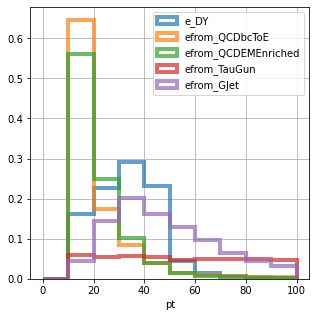

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i,group_df in df.groupby("EleType"):
    print(i)
    #if i!=2: continue
    #group_df["ele_pt"].hist(bins=np.linspace(0, 1000, 501),histtype='step', alpha=0.7,label=label[i], ax=ax, density=False, ls='-', weights = np.ones_like(group_df["ele_pt"]) / len(group_df["ele_pt"]),linewidth=4)
    group_df["ele_pt"].hist(bins=np.linspace(0, 100, 11),histtype='step', alpha=0.7,label=label[i], ax=ax, density=False, ls='-', linewidth=4, weights = group_df["xsecwt"]/group_df["xsecwt"].sum())
    ax.legend(loc='upper right')
    ax.set_xlabel("pt")
    #ax.set_yscale("log", nonposy='clip')
    #ax.set_ylim(0,1.5)
fig.savefig(plot_dir+"pT_before_rwt.pdf")

In [7]:


df.loc[df["EleType"] == 0, "IsSignal"] = 1
df.loc[df["EleType"] == 1, "IsSignal"] = 1

df.loc[df["EleType"] == 2, "IsSignal"] = 0
df.loc[df["EleType"] == 3, "IsSignal"] = 0
df.loc[df["EleType"] == 4, "IsSignal"] = 0

In [8]:
from sklearn.model_selection import train_test_split

EB_train, EB_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

'''
for i,group_df in EB_train.groupby("ele_pt_bin"):
    for j,group_df2 in EB_train.groupby("EleType"):
        EB_train.loc[(EB_train["EleType"] == j) & (EB_train["ele_pt_bin"]==i), "NewWt"] = EB_train.loc[(EB_train["EleType"] == j) & (EB_train["ele_pt_bin"]==i), "xsecwt"] / (EB_train.loc[(EB_train["EleType"] == j) & (EB_train["ele_pt_bin"]==i), "xsecwt"].sum())


for i,group_df in EB_test.groupby("ele_pt_bin"):
    for j,group_df2 in EB_test.groupby("EleType"):
        EB_test.loc[(EB_test["EleType"] == j) & (EB_test["ele_pt_bin"]==i), "NewWt"] = EB_test.loc[(EB_test["EleType"] == j) & (EB_test["ele_pt_bin"]==i), "xsecwt"] / (EB_test.loc[(EB_test["EleType"] == j) & (EB_test["ele_pt_bin"]==i), "xsecwt"].sum())
'''     

EB_train["ele_pt_bin"] = pd.cut(EB_train["ele_pt"], bins=pt_bins, labels=list(range(len(pt_bins)-1)))
EB_train["ele_eta_bin"] = pd.cut(EB_train["scl_eta"], bins=eta_bins, labels=list(range(len(eta_bins)-1)))

EB_test["ele_pt_bin"] = pd.cut(EB_test["ele_pt"], bins=pt_bins, labels=list(range(len(pt_bins)-1)))
EB_test["ele_eta_bin"] = pd.cut(EB_test["scl_eta"], bins=eta_bins, labels=list(range(len(eta_bins)-1)))


for j,group_df2 in EB_train.groupby("EleType"):
    EB_train.loc[(EB_train["EleType"] == j), "NewWt"] = EB_train.loc[(EB_train["EleType"] == j), "xsecwt"] / (EB_train.loc[(EB_train["EleType"] == j), "xsecwt"].sum())
for j,group_df2 in EB_test.groupby("EleType"):
    EB_test.loc[(EB_test["EleType"] == j), "NewWt"] = EB_test.loc[(EB_test["EleType"] == j), "xsecwt"] / (EB_test.loc[(EB_test["EleType"] == j), "xsecwt"].sum())   

<ipython-input-8-4280084326cd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EB_train["ele_pt_bin"] = pd.cut(EB_train["ele_pt"], bins=pt_bins, labels=list(range(len(pt_bins)-1)))
<ipython-input-8-4280084326cd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EB_train["ele_eta_bin"] = pd.cut(EB_train["scl_eta"], bins=eta_bins, labels=list(range(len(eta_bins)-1)))
<ipython-input-8-4280084326cd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

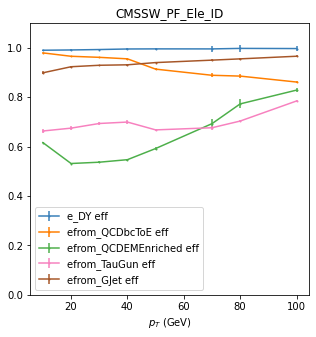

In [9]:
import Tools.effunc as effg
effg.EffTrend(cat='IsSignal',var='passElectronSelection',Wt='NewWt',groupbyvar='ele_pt_bin',ptbins=pt_bins,label='$p_T$ (GeV)',title='CMSSW_PF_Ele_ID',plotname="CMSSW_PF_Ele_ID.pdf",df=EB_train,plot_dir=plot_dir)

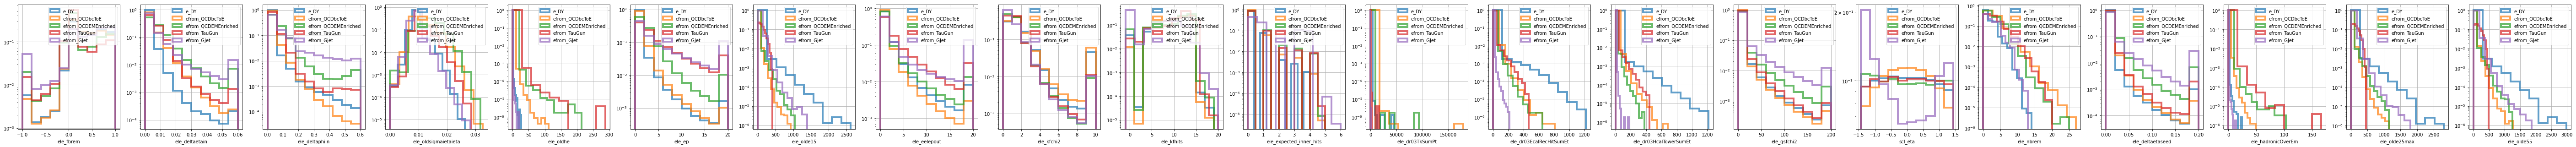

In [10]:
fig, axes = plt.subplots(1, len(features), figsize=(100, 5))

#df_new=pd.DataFrame()

for m in range(len(features)):
    #print(features[m-1])
    for i,group_df in EB_train.groupby(cat):
        #group_df['NewWt']= group_df['NewWt']/(group_df['NewWt'].sum())
        #ax=plt.gca()
        #group_df["ele_pt"].hist(bins=np.linspace(0, 300, 101),histtype='step', alpha=0.7,label=label[i], ax=axes[m-1], density=False, ls='-', weights =group_df["NewWt"],linewidth=4)
        # group_df[features[m-1]].hist(bins=feature_bins[m-1],histtype='step', alpha=0.7,label=label[i], ax=axes[m-1], density=False, ls='-', weights =group_df["NewWt"],linewidth=4)
        
        group_df[features[m-1]].hist(histtype='step', alpha=0.7,label=label[i], ax=axes[m-1], density=False, ls='-', weights =group_df["NewWt"],linewidth=4)
        #df_new = pd.concat([group_df, df_new],ignore_index=True, sort=False)
    axes[m-1].legend(loc='upper right')
    axes[m-1].set_xlabel(features[m-1])
    axes[m-1].set_yscale("log")
    #axes[m-1].set_ylim(0,1.5)

fig.savefig(plot_dir+"Train_Features_After_reweighting.pdf")

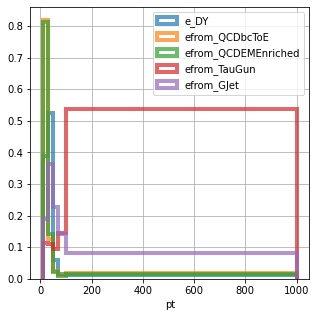

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i,group_df in EB_train.groupby(cat):   
    group_df["ele_pt"].hist(bins=[10,30,50,70,100,1000],histtype='step', alpha=0.7,label=label[i], ax=ax, density=False, ls='-', weights =group_df["NewWt"],linewidth=4)
    ax.legend(loc='upper right')
    ax.set_xlabel("pt")
    #ax.set_yscale("log", nonposy='clip')
    #ax.set_ylim(0,1.5)
    
fig.savefig(plot_dir+"ele_pt_After_reweighting.pdf")

In [12]:
from tensorflow.keras.utils import to_categorical, plot_model

X_train = np.asarray(EB_train[features])
y_train_o = np.asarray(EB_train[cat])
Wt_train = np.asarray(EB_train[Wt])

X_test = np.asarray(EB_test[features])
y_test_o = np.asarray(EB_test[cat])
Wt_test = np.asarray(EB_test[Wt])

# Transform to encoded array
y_train = to_categorical(y_train_o)
y_test = to_categorical(y_test_o)

In [13]:
NN=0


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.random.set_seed(1)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Reshape, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam, Adadelta, Adagrad, schedules

if NN==1:
    model=Sequential()
    model.add(Dense(numfeatures, kernel_initializer=initializer1, activation='relu', input_dim=numfeatures))
    #model.add(Dense(2*numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(2*numfeatures, kernel_initializer=initializer1, activation='relu'))
    #model.add(Dense(4*numfeatures, kernel_initializer=initializer1, activation='relu'))
    #model.add(Dense(4*numfeatures, kernel_initializer=initializer1, activation='relu'))
    #model.add(Dense(4*numfeatures, kernel_initializer=initializer1, activation='relu'))
    #model.add(Dense(2*numfeatures, kernel_initializer=initializer1, activation='relu'))
    #model.add(Dense(2*numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(10, kernel_initializer=initializer1, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(len(df.EleType.unique()), kernel_initializer='glorot_uniform', activation='softmax'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy',])

if NN==0:
    model=Sequential()
    model.add(Dense(numfeatures, kernel_initializer=initializer1, activation='relu', input_dim=numfeatures))
    #model.add(Dense(2*numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(2*numfeatures, kernel_initializer=initializer1, activation='relu'))
    #model.add(Dense(4*numfeatures, kernel_initializer=initializer1, activation='relu'))
    #model.add(Dense(4*numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(4*numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(4*numfeatures, kernel_initializer=initializer1, activation='relu'))
    #model.add(Dense(2*numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(2*numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(numfeatures, kernel_initializer=initializer1, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, kernel_initializer=initializer1, activation='relu'))
    model.add(Dense(len(df.EleType.unique()), kernel_initializer='glorot_uniform', activation='softmax'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    
    lr_schedule = schedules.ExponentialDecay(initial_learning_rate=1e-3,decay_steps=10000,decay_rate=0.9)
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr_schedule), metrics=['accuracy',])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test,Wt_test),epochs=epochs,batch_size=batch_size,shuffle=True,sample_weight=Wt_train,callbacks=[es])

Train on 4570061 samples, validate on 1142516 samples
Epoch 1/300
4565000/4570061 [============================>.] - ETA: 0s - loss: 1.3289e-06 - accuracy: 0.5097

/home/akapoor/miniconda3/envs/py39_tf2.4gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


4570061/4570061 [==============================] - 11s 3us/sample - loss: 1.3286e-06 - accuracy: 0.5098 - val_loss: 4.3349e-06 - val_accuracy: 0.6025
Epoch 2/300
4570061/4570061 [==============================] - 11s 2us/sample - loss: 1.0263e-06 - accuracy: 0.6262 - val_loss: 3.6057e-06 - val_accuracy: 0.6654
Epoch 3/300
4570061/4570061 [==============================] - 11s 2us/sample - loss: 8.8182e-07 - accuracy: 0.6827 - val_loss: 3.1950e-06 - val_accuracy: 0.6879
Epoch 4/300
4570061/4570061 [==============================] - 11s 2us/sample - loss: 8.0051e-07 - accuracy: 0.7132 - val_loss: 3.1839e-06 - val_accuracy: 0.7403
Epoch 5/300
4570061/4570061 [==============================] - 11s 2us/sample - loss: 7.4418e-07 - accuracy: 0.7333 - val_loss: 2.7855e-06 - val_accuracy: 0.7481
Epoch 6/300
4570061/4570061 [==============================] - 11s 2us/sample - loss: 7.0902e-07 - accuracy: 0.7413 - val_loss: 2.6570e-06 - val_accuracy: 0.7549
Epoch 7/300
4570061/4570061 [===========

In [ ]:
model.save(plot_dir+'my_model.h5')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper left')
fig.savefig(plot_dir+"loss.pdf")

In [ ]:
y_train_pred=np.array(model.predict(X_train,batch_size=batch_size))
y_test_pred=np.array(model.predict(X_test,batch_size=batch_size))

In [ ]:
from sklearn.metrics import roc_curve, auc

n_classes=len(df.EleType.unique())
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
figMVA, axesMVA = plt.subplots(2, 3, figsize=(20, 20))

for i in range(n_classes):
    
    if i==0:
        ax=axes[0,0]
        axMVA=axesMVA[0,0]
    if i==1:
        ax=axes[0,1]
        axMVA=axesMVA[0,1]
    if i==2:
        ax=axes[1,0]
        axMVA=axesMVA[1,0]
    if i==3:
        ax=axes[1,1]
        axMVA=axesMVA[1,1]
    if i==4:
        ax=axes[0,2]
        axMVA=axesMVA[0,2]
    
    axMVA.hist([y_test_pred[:, i][y_test[:, 0]==1],
                y_test_pred[:, i][y_test[:, 1]==1],
                y_test_pred[:, i][y_test[:, 2]==1],
                y_test_pred[:, i][y_test[:, 3]==1],
                y_test_pred[:, i][y_test[:, 4]==1]],bins=np.linspace(0, 1, 21),label=["e_DY","efrom_QCDbcToE","efrom_QCDEMEnriched","efrom_TauGun","efrom_GJet"],
               weights=[Wt_test[y_test[:, 0]==1]/np.sum(Wt_test[y_test[:, 0]==1]),
                        Wt_test[y_test[:, 1]==1]/np.sum(Wt_test[y_test[:, 1]==1]),
                        Wt_test[y_test[:, 2]==1]/np.sum(Wt_test[y_test[:, 2]==1]),
                        Wt_test[y_test[:, 3]==1]/np.sum(Wt_test[y_test[:, 3]==1]),
                        Wt_test[y_test[:, 4]==1]/np.sum(Wt_test[y_test[:, 4]==1])],histtype='step',linewidth=2,color=['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628'])
    axMVA.hist([y_train_pred[:, i][y_train[:, 0]==1],
                y_train_pred[:, i][y_train[:, 1]==1],
                y_train_pred[:, i][y_train[:, 2]==1],
                y_train_pred[:, i][y_train[:, 3]==1],
                y_train_pred[:, i][y_train[:, 4]==1]],bins=np.linspace(0, 1, 21),label=["e_DY","efrom_QCDbcToE","efrom_QCDEMEnriched","efrom_TauGun","efrom_GJet"],
               weights=[Wt_train[y_train[:, 0]==1]/np.sum(Wt_train[y_train[:, 0]==1]),
                        Wt_train[y_train[:, 1]==1]/np.sum(Wt_train[y_train[:, 1]==1]),
                        Wt_train[y_train[:, 2]==1]/np.sum(Wt_train[y_train[:, 2]==1]),
                        Wt_train[y_train[:, 3]==1]/np.sum(Wt_train[y_train[:, 3]==1]),
                        Wt_train[y_train[:, 4]==1]/np.sum(Wt_train[y_train[:, 4]==1])],histtype='stepfilled',alpha=0.3,color=['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628'])
    axMVA.set_title('MVA: Node '+str(i+1),fontsize=20)
    
    fpr, tpr, th = roc_curve(y_test[:, i], y_test_pred[:, i])
    fpr_tr, tpr_tr, th_tr = roc_curve(y_train[:, i], y_train_pred[:, i])
    mask = tpr > 0.8
    fpr, tpr = fpr[mask], tpr[mask]
    
    mask = tpr_tr > 0.8
    fpr_tr, tpr_tr = fpr_tr[mask], tpr_tr[mask]
    
    roc_auc = auc(fpr, tpr)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    
    ax.plot(tpr, fpr, label='ROC curve test (area = %0.2f)' % roc_auc,linewidth=4)
    ax.plot(tpr_tr, fpr_tr, label='ROC curve train (area = %0.2f)' % roc_auc_tr,linewidth=4)
    #plt.plot([0, 1], [0, 1], 'k--')
    #ax.set_xlim([0.8, 1.0])
    #ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Signal efficiency',fontsize=20)
    ax.set_ylabel('Background efficiency',fontsize=20)
    ax.set_title('ROC: Node '+str(i+1),fontsize=20)
    #ax.set_yscale("log", nonposy='clip')
    ax.legend(loc="upper left",fontsize=10)
    axMVA.legend(loc="upper right",fontsize=10)
fig.savefig(plot_dir+"ROC.pdf")
figMVA.savefig(plot_dir+"MVA.pdf")

In [ ]:
figMVA_One, axesMVA_One = plt.subplots(1, 1, figsize=(5, 5))

axesMVA_One.hist([np.sum([y_test_pred[:, 0][y_test[:, 0]==1],y_test_pred[:, 1][y_test[:, 0]==1]],axis=0),
                  np.sum([y_test_pred[:, 0][y_test[:, 1]==1],y_test_pred[:, 1][y_test[:, 1]==1]],axis=0),
                  np.sum([y_test_pred[:, 0][y_test[:, 2]==1],y_test_pred[:, 1][y_test[:, 2]==1]],axis=0),
                  np.sum([y_test_pred[:, 0][y_test[:, 3]==1],y_test_pred[:, 1][y_test[:, 3]==1]],axis=0),
                  np.sum([y_test_pred[:, 0][y_test[:, 4]==1],y_test_pred[:, 1][y_test[:, 4]==1]],axis=0)],
                 bins=np.linspace(0, 1, 41),label=["e_DY","efrom_QCDbcToE","efrom_QCDEMEnriched","efrom_TauGun","efrom_GJet"],
                 histtype='step',linewidth=2,color=['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628'],
                 weights=[Wt_test[y_test[:, 0]==1]/np.sum([Wt_test[y_test[:, 0]==1]]),
                          Wt_test[y_test[:, 1]==1]/np.sum([Wt_test[y_test[:, 1]==1]]),
                          Wt_test[y_test[:, 2]==1]/np.sum([Wt_test[y_test[:, 2]==1]]),
                          Wt_test[y_test[:, 3]==1]/np.sum([Wt_test[y_test[:, 3]==1]]),
                          Wt_test[y_test[:, 4]==1]/np.sum([Wt_test[y_test[:, 4]==1]])])
axesMVA_One.hist([np.sum([y_train_pred[:, 0][y_train[:, 0]==1],y_train_pred[:, 1][y_train[:, 0]==1]],axis=0),
                  np.sum([y_train_pred[:, 0][y_train[:, 1]==1],y_train_pred[:, 1][y_train[:, 1]==1]],axis=0),
                  np.sum([y_train_pred[:, 0][y_train[:, 2]==1],y_train_pred[:, 1][y_train[:, 2]==1]],axis=0),
                  np.sum([y_train_pred[:, 0][y_train[:, 3]==1],y_train_pred[:, 1][y_train[:, 3]==1]],axis=0),
                  np.sum([y_train_pred[:, 0][y_train[:, 4]==1],y_train_pred[:, 1][y_train[:, 4]==1]],axis=0)],
                 bins=np.linspace(0, 1, 41),label=["e_DY","efrom_QCDbcToE","efrom_QCDEMEnriched","efrom_TauGun","efrom_GJet"],
                 weights=[Wt_train[y_train[:, 0]==1]/np.sum(Wt_train[y_train[:, 0]==1]),
                          Wt_train[y_train[:, 1]==1]/np.sum(Wt_train[y_train[:, 1]==1]),
                          Wt_train[y_train[:, 2]==1]/np.sum(Wt_train[y_train[:, 2]==1]),
                          Wt_train[y_train[:, 3]==1]/np.sum(Wt_train[y_train[:, 3]==1]),
                          Wt_train[y_train[:, 4]==1]/np.sum(Wt_train[y_train[:, 4]==1])],alpha=0.2,histtype='stepfilled',linewidth=1,color=['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628'])
axesMVA_One.legend(loc="center")
axesMVA_One.set_ylim(0,1.0)
figMVA_One.savefig(plot_dir+"ROC_sum12.pdf")

In [ ]:
EB_test["scoreSum12DNN"] = np.sum([y_test_pred[:, 0],y_test_pred[:, 1]],axis=0)


# In[98]:


EB_train["scoreSum12DNN"] = np.sum([y_train_pred[:, 0],y_train_pred[:, 1]],axis=0)


# In[99]:


EB_train['scoreSum12DNN'].corr(EB_train['ele_pt'])


# In[100]:


EB_test['scoreSum12DNN'].corr(EB_test['ele_pt'])


# In[101]:

In [ ]:
import Tools.effunc as effg

EB_test["scoreSum12DNN"] = np.sum([y_test_pred[:, 0],y_test_pred[:, 1]],axis=0)
EB_train["scoreSum12DNN"] = np.sum([y_train_pred[:, 0],y_train_pred[:, 1]],axis=0)

mydf=EB_train.query("IsSignal==1")[['scoreSum12DNN']].quantile([1-0.98,1-0.95])

EB_train.loc[EB_train["scoreSum12DNN"] > mydf.iat[0,0], "scoreSum12DNNpass"] = 1
EB_train.loc[EB_train["scoreSum12DNN"] < mydf.iat[0,0], "scoreSum12DNNpass"] = 0

EB_train.loc[EB_train["scoreSum12DNN"] > mydf.iat[1,0], "scoreSum12DNNpass95"] = 1
EB_train.loc[EB_train["scoreSum12DNN"] < mydf.iat[1,0], "scoreSum12DNNpass95"] = 0


effg.EffTrend(cat='IsSignal',var='scoreSum12DNNpass',Wt='NewWt',groupbyvar='ele_pt_bin',ptbins=pt_bins,label='$p_T$ (GeV)',title="New MultiClass PF Ele ID",plotname="New_MultiClass_PF_Ele_ID_Val="+str(mydf.iat[0,0])+".pdf",df=EB_train,plot_dir=plot_dir)

effg.EffTrend(cat='IsSignal',var='scoreSum12DNNpass95',Wt='NewWt',groupbyvar='ele_pt_bin',ptbins=pt_bins,label='$p_T$ (GeV)',title="New MultiClass PF Ele ID",plotname="New_MultiClass_PF_Ele_ID_Val95="+str(mydf.iat[1,0])+".pdf",df=EB_train,plot_dir=plot_dir)

effg.EffTrend(cat='IsSignal',var='passElectronSelection',Wt='NewWt',groupbyvar='ele_pt_bin',ptbins=pt_bins, label='$p_T$ (GeV)',title='CMSSW_PF_Ele_ID',plotname="CMSSW_PF_Ele_ID.pdf",df=EB_train,plot_dir=plot_dir)


In [ ]:
ax=plt.gca()
EB_train.groupby(['EleType']).size().plot(kind = "bar",ax=ax)
ax.set_xticklabels(labels=["DY",'bHad',"QCD","Tau","GJet"],ha='center')
ax.set_xlabel("Process")
plt.savefig(plot_dir+"TrainStat.pdf")
ax.set_title("Training Stat for each process")

In [ ]:
ax=plt.gca()
EB_test.groupby(['EleType']).size().plot(kind = "bar",ax=ax)
ax.set_xticklabels(labels=["DY",'bHad',"QCD","Tau","GJet"],ha='center')
ax.set_xlabel("Process")
plt.savefig(plot_dir+"TestStat.pdf")
ax.set_title("Testing Stat for each process")

In [ ]:
effg.EffTrend(cat='IsSignal',var='scoreSum12DNNpass',Wt='NewWt',groupbyvar='ele_eta_bin',label='eta',ptbins=eta_bins,title="New MultiClass PF Ele ID",plotname="New_MultiClass_PF_Ele_ID_etabin_Val="+str(mydf.iat[0,0])+".pdf",df=EB_train,plot_dir=plot_dir)

effg.EffTrend(cat='IsSignal',var='scoreSum12DNNpass95',Wt='NewWt',groupbyvar='ele_eta_bin',label='eta',ptbins=eta_bins,title="New MultiClass PF Ele ID",plotname="New_MultiClass_PF_Ele_ID_etabin_Val95="+str(mydf.iat[1,0])+".pdf",df=EB_train,plot_dir=plot_dir)

effg.EffTrend(cat='IsSignal',var='passElectronSelection',Wt='NewWt',groupbyvar='ele_eta_bin',label='eta',ptbins=eta_bins,title='CMSSW_PF_Ele_ID',plotname="CMSSW_PF_Ele_ID.pdf",df=EB_train,plot_dir=plot_dir)

In [ ]:
mydf=EB_train.query("IsSignal==1")[['scoreSum12DNN']].quantile([1-0.995,1-0.99])

EB_train.loc[EB_train["scoreSum12DNN"] > mydf.iat[0,0], "scoreSum12DNNpass995"] = 1
EB_train.loc[EB_train["scoreSum12DNN"] < mydf.iat[0,0], "scoreSum12DNNpass995"] = 0

EB_train.loc[EB_train["scoreSum12DNN"] > mydf.iat[1,0], "scoreSum12DNNpass99"] = 1
EB_train.loc[EB_train["scoreSum12DNN"] < mydf.iat[1,0], "scoreSum12DNNpass99"] = 0

effg.EffTrend(cat='IsSignal',var='passElectronSelection',Wt='NewWt',groupbyvar='ele_pt_bin',ptbins=pt_bins,label='$p_T$ (GeV)',title='CMSSW_PF_Ele_ID',plotname="CMSSW_PF_Ele_ID.pdf",df=EB_train,plot_dir=plot_dir)

effg.EffTrend(cat='IsSignal',var='scoreSum12DNNpass995',Wt='NewWt',groupbyvar='ele_pt_bin',ptbins=pt_bins,label='$p_T$ (GeV)',title="New MultiClass PF Ele ID",plotname="New_MultiClass_PF_Ele_ID_Val995="+str(mydf.iat[0,0])+".pdf",df=EB_train,plot_dir=plot_dir)

effg.EffTrend(cat='IsSignal',var='scoreSum12DNNpass99',Wt='NewWt',groupbyvar='ele_pt_bin',ptbins=pt_bins,label='$p_T$ (GeV)',title="New MultiClass PF Ele ID",plotname="New_MultiClass_PF_Ele_ID_Val99="+str(mydf.iat[1,0])+".pdf",df=EB_train,plot_dir=plot_dir)

In [ ]:
import shap

shap.initjs()

background = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(X_test[:5000])

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar",feature_names=features)